In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_x(omega, t, x0=0):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        t: scalar float, time in s
        x0: scalar float, initial angle at t=0 in radians, default x0=0
    Outputs:
        x: scalar float, angle at t=t in radians, between [0, 2 pi)
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    x = x0 + omega*t
    x = np.mod(x,2*np.pi)
    epsilon = 10**-10 ## for floating points error in modulo
    
    if type(x) != np.ndarray:
        return x
    for i in range(len(x)):
        if x[i] > 2*np.pi - epsilon or x[i] < epsilon:
            x[i] = 0.0

    return x

In [3]:
def sample_x(omega, Fs, tfinal):
    '''
    Inputs:
        omega: scalar float, the angular velocity in radians/s
        Fs: (float) sampling rate in Hz
        tfinal: (float) final time in s
    Output:
        xs: (np array, 1D float) samples of x from t=0 to t=tfinal
        ts: (np array, 1D float) samples of t from t=0 to t=tfinal, sampled uniformly
    '''

    ### WRITE YOUR CODE HERE - 5 MARKS
    
    ts = np.arange(0,tfinal,1/Fs)
    xs=generate_x(omega,ts)

    return xs, ts

In [4]:
r = 3
omega = 2*np.pi*(r+2)
Fs = 128
tfinal = 1

In [5]:
xs,ts = sample_x(omega , Fs, tfinal)

Text(0.5, 0, 'n')

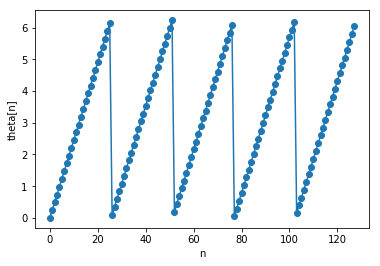

In [21]:
plt.plot(xs, 'o-')
plt.ylabel('theta[n]')
plt.xlabel('n')

In [7]:
s = []
for i in range(len(xs)):
    s.append((xs[i] , i))

In [8]:
np.random.seed(r+2)
np.random.shuffle(s)

In [9]:
N = 10

s_train = s[:N]
s_test = s[N:]

s_train.sort(key=lambda x:x[1])
s_test.sort(key=lambda x:x[1])

In [10]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for x in s_train:
    X_train.append(x[1])
    Y_train.append(x[0])
for x in s_test:
    X_test.append(x[1])
    Y_test.append(x[0])

Text(0, 0.5, 'theta[n]')

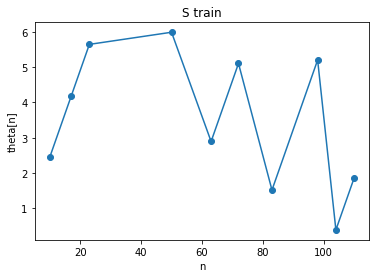

In [22]:
plt.plot(X_train, Y_train, 'o-')
plt.title('S train')
plt.xlabel('n')
plt.ylabel('theta[n]')

Text(0, 0.5, 'theta[n]')

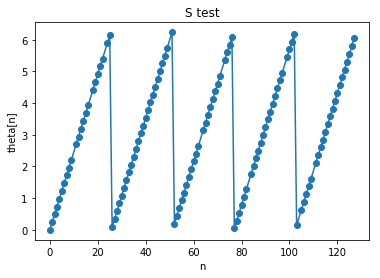

In [23]:
plt.plot(X_test, Y_test, 'o-')
plt.title('S test')
plt.xlabel('n')
plt.ylabel('theta[n]')

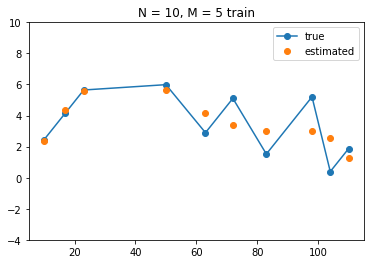

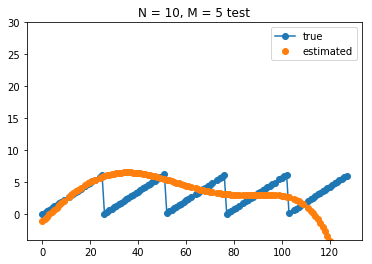

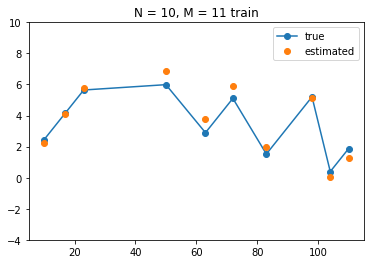

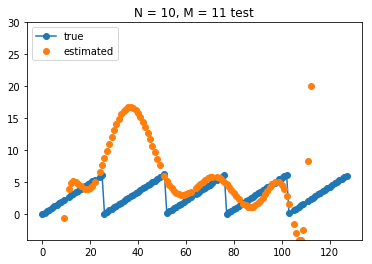

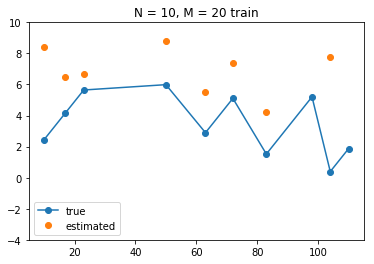

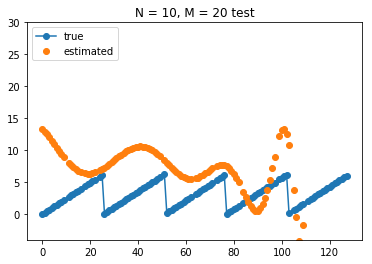

In [19]:
loss = []
for M in [5, 11, 20]:

    X = []
    Y = []
#     X_train = X_train/128
#     i = 0
    for x in X_train:
        x = x/128
        a = []
        for m in range(M+1):
            a.append(x**m)
        X.append(a)
    for y in Y_train:
        Y.append(y)

    X = np.array(X, dtype = 'float')
    Y = np.array(Y, dtype = 'float')

#     X = X/np.mean(X, axis = 0)
#     Y = Y/np.mean(Y, axis = 0)

    Xt = []
    Yt = []
#     X_test = X_test/128
    for x in X_test:
        x = x/128
        a = []
        for m in range(M+1):
            a.append(x**m)
        Xt.append(a)
    for y in Y_test:
        Yt.append(y)

    Xt = np.array(Xt)
    Yt = np.array(Yt)

#     Xt= Xt/np.mean(Xt, axis = 0)
#     Yt= Yt/np.mean(Yt, axis = 0)
    
    W = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.transpose() , X)), X.transpose()) ,Y)

#     pred_train = LR.predict(X)
    pred_train = np.matmul(X,W)
    pred_test = np.matmul(Xt,W)
    
    l = 0
    for x in (pred_train - Y_train):
        l = l + x*x
    loss.append(l/10)

    #train
    plt.figure()
#     plt.subplot(121)
    plt.title("N = 10, M = " + str(M) + " train")
    plt.plot(X_train, Y_train, 'o-', label = "true")
    plt.plot(X_train, pred_train, 'o', label = "estimated")
    plt.legend()
    plt.ylim((-4,10))
    plt.show()

    #test
    plt.figure()
#     plt.subplot(122)
    plt.title("N = 10, M = " + str(M) + " test")
    plt.plot(X_test, Y_test, 'o-', label = "true")
    plt.plot(X_test, pred_test, 'o', label = "estimated")
    plt.legend()
    plt.ylim((-4,30))
    plt.show()
    
    print()
#     print("M change")
    print()